1. load the data into a dataframe df, show its size and head, eliminate
the rows containing null values and show the number of remaining
rows
(2pt)
2. produce a pairplot of the numeric columns of df and comment
relevant situations
(2pt)
3. Produce a box plot of the numeric columns of df and comment
relevant situations
(2pt)
4. Produce the correlation matrix of the data and eliminate the
redundant attributes, if it is adequate
(4pt)
• For example, if attributes a and b have high correlation (e.g.
absolute value higher than 0.95) one of the two can be
eliminated
• Refer to this
https://stackoverflow.com/questions/29432629/plot-
correlation-matrix-using-pandas for the generation of the
correlation matrix
5. Split the reduced data: store the first column in a vector keys and the
others in a matrix X
(2pt)
6. Find the best clustering scheme for the data (possibly reduced after
step 4) with a method of your choice, plot global silhouette index for
an appropriate range of hyperparameter(s) and show the chosen
hyperparameter(s)
(4pt)
7. Fit the clustering scheme to y, then produce the silhouette plot using
the function plot_silhouette contained in the attached file
(4pt)
8. Perform a logarithmic transformation of the data
(4pt)
• This means simply to apply the log function of numpy
•
If one of the columns has zero or negative values, avoid its
transformation
9. repeat points 6 and 7 above and comment the comparison with the
result of point 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

random_state = 42
np.random.seed(random_state)
warnings.filterwarnings('ignore')
%matplotlib inline

filename = './datasets/country_stats.csv'
delimiter = ','

# 1

In [2]:
df = pd.read_csv(filepath_or_buffer = filename, sep = delimiter)
oldcols = df.columns[1:]
oldcols = oldcols.insert(0, 'Country Name')
df.columns = oldcols
print(f'Dataset with {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

Dataset with 242 rows and 8 columns


,Country Name,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,Afghanistan,1.593680e+10,1.593680e+10,553.300289,553.300289,4.0,2.812617,28803167.0
1,Albania,1.192695e+10,1.192695e+10,4094.358832,4094.358832,45.0,-0.496462,2913021.0
2,Algeria,1.612073e+11,1.612073e+11,4463.394675,4463.394675,12.5,1.821358,36117637.0
3,American Samoa,5.760000e+08,5.760000e+08,10352.822762,10352.822762,NaN,-1.054862,55637.0
4,Andorra,3.355695e+09,3.355695e+09,39736.354063,39736.354063,81.0,-0.015393,84449.0


In [3]:
df = df.dropna()
print(f'Remaining rows: {df.shape[0]}')

Remaining rows: 221


# 2

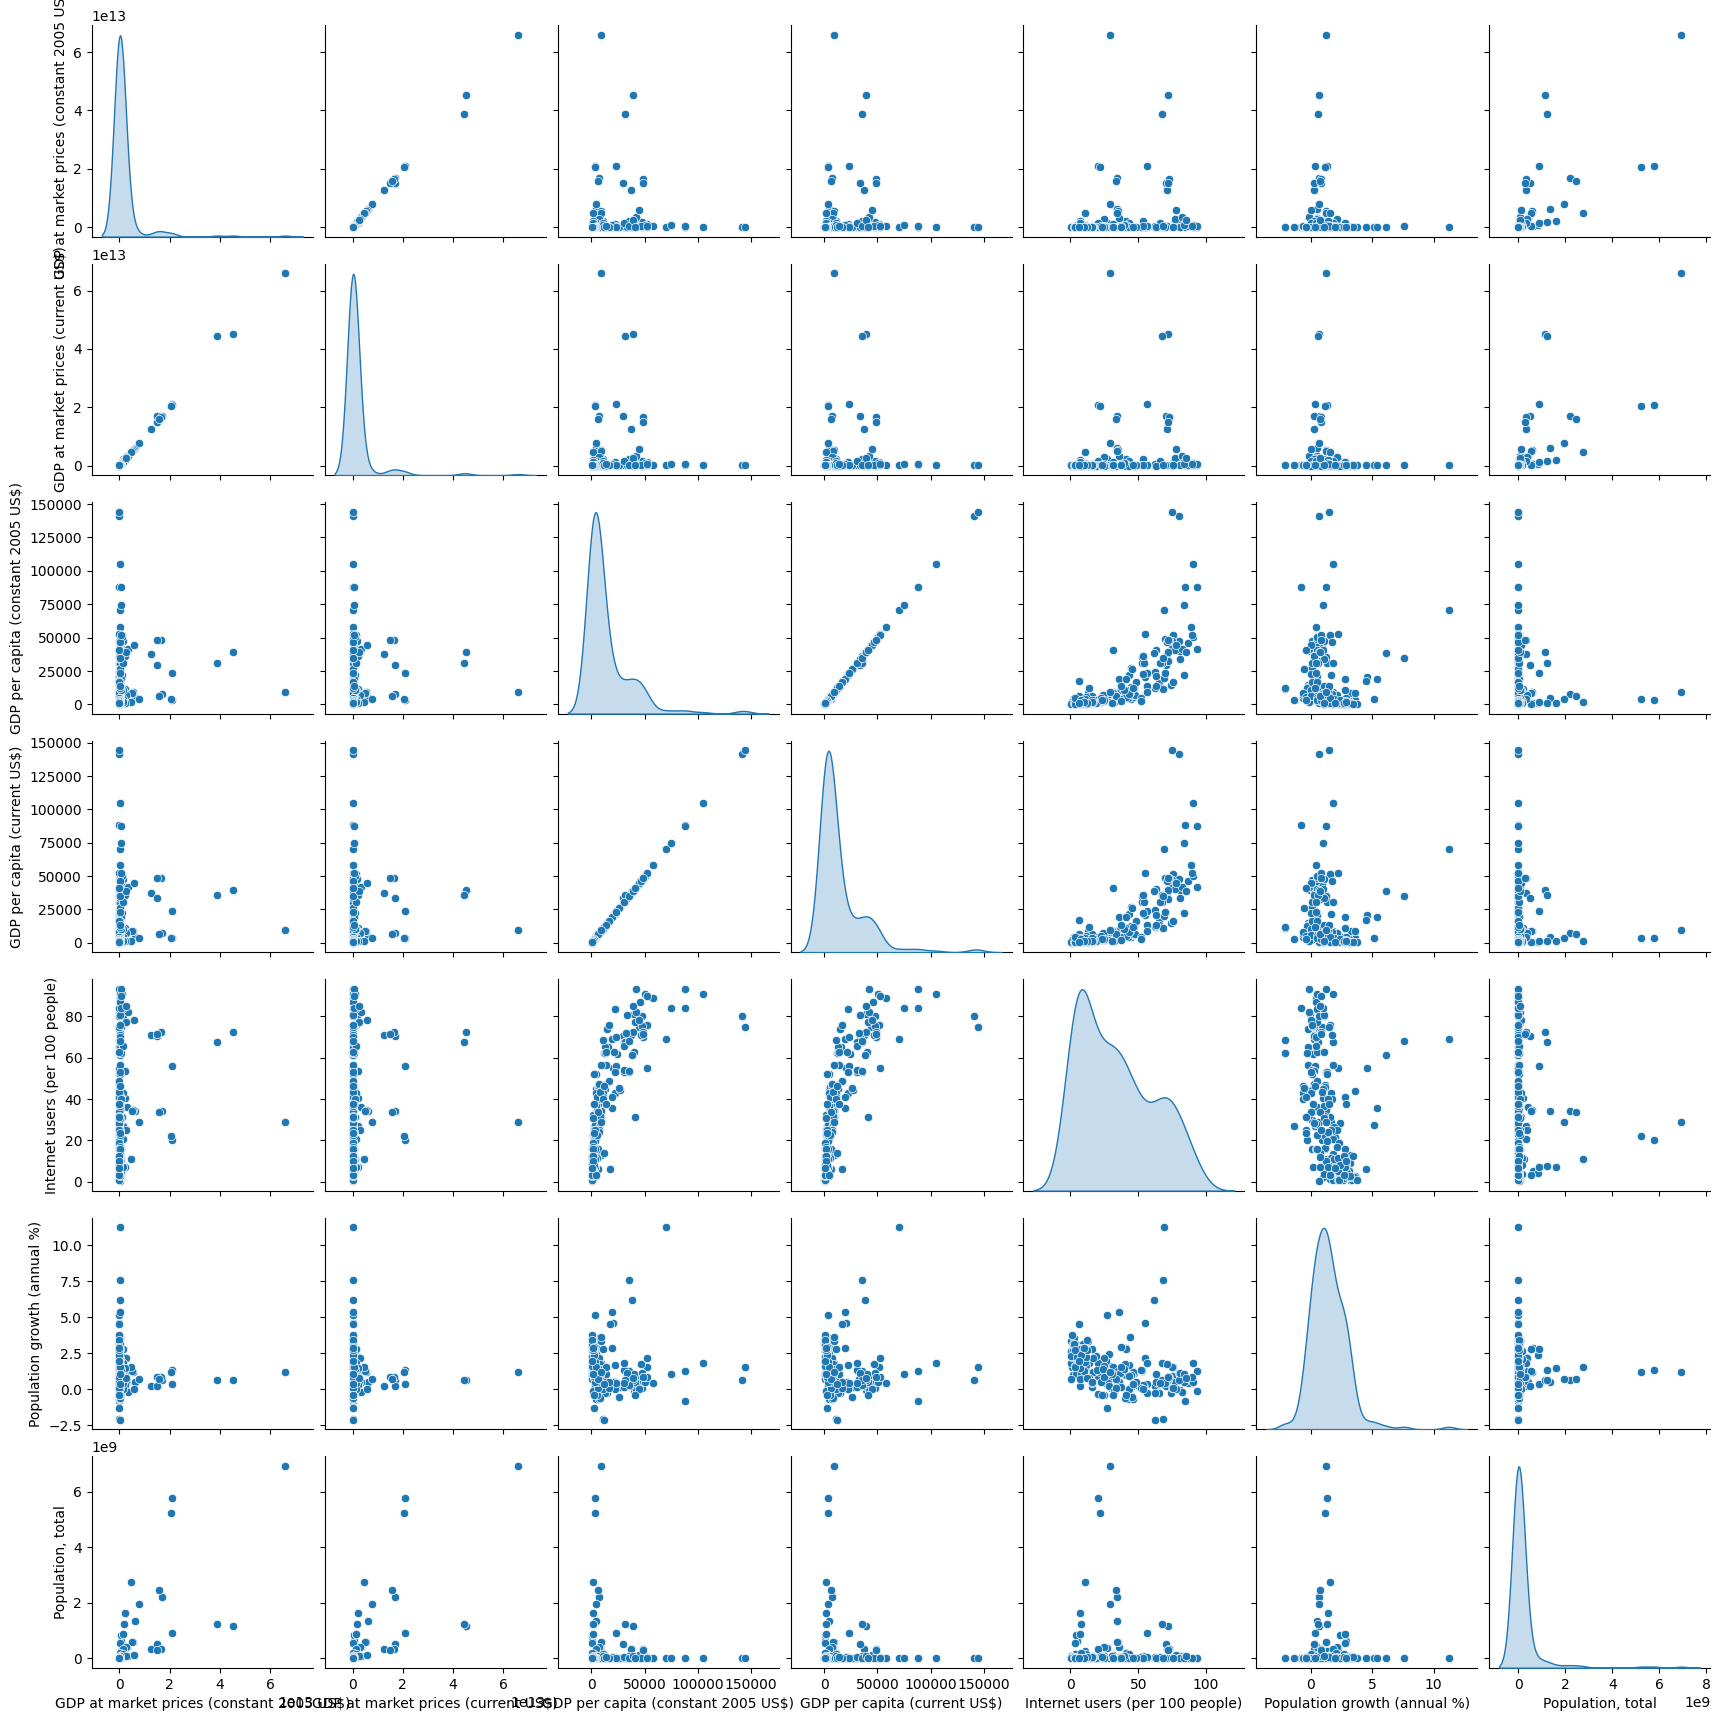

In [4]:
X = df.iloc[:, 1:]
sns.pairplot(X, diag_kind = 'kde');

The pairplot does not show any relevant situation. We can note that data have an high range of value

# 3

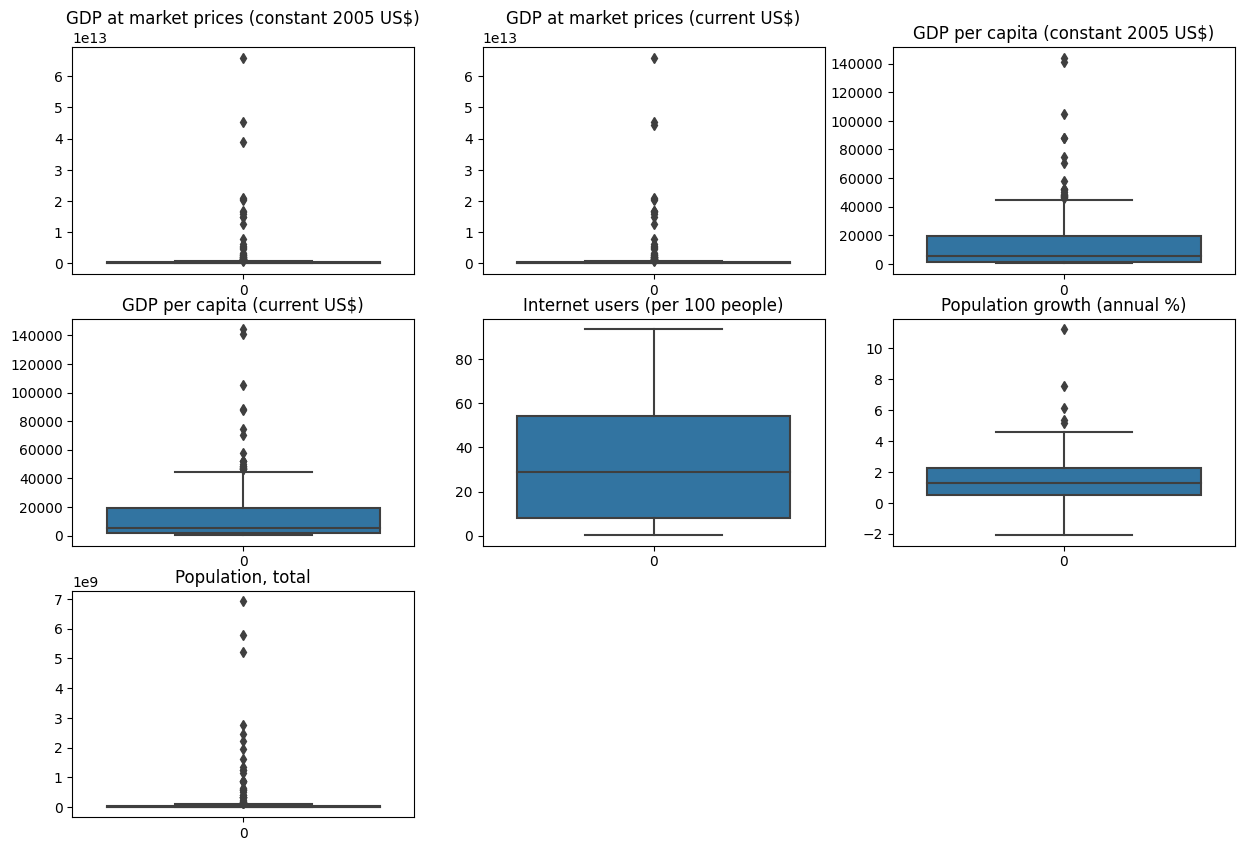

In [5]:
plt.figure(figsize = (15, 10))
pos = 1
for col in X.columns:
    plt.subplot(3, 3, pos)
    plt.title(col)
    sns.boxplot(X[col])
    pos += 1

Also from this plot we can note that there are a lot of outliers and data values are distributed in a very large space

# 4

In [6]:
correlation_matrix = X.corr()
correlation_matrix 
# we can delete columns whose correlataion is very high

,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
GDP at market prices (constant 2005 US$),1.000000,0.998671,0.082985,0.089343,0.140434,-0.103056,0.743659
GDP at market prices (current US$),0.998671,1.000000,0.084445,0.091601,0.143265,-0.103523,0.731674
GDP per capita (constant 2005 US$),0.082985,0.084445,1.000000,0.999829,0.757132,-0.101623,-0.076738
GDP per capita (current US$),0.089343,0.091601,0.999829,1.000000,0.758325,-0.102485,-0.075101
Internet users (per 100 people),0.140434,0.143265,0.757132,0.758325,1.000000,-0.356460,-0.062403
Population growth (annual %),-0.103056,-0.103523,-0.101623,-0.102485,-0.356460,1.000000,-0.037483
"Population, total",0.743659,0.731674,-0.076738,-0.075101,-0.062403,-0.037483,1.000000


In [7]:
to_delete = ['GDP at market prices (current US$)', 'GDP per capita (current US$)']
X = X.drop(columns = to_delete, axis = 1)
X.head()

,GDP at market prices (constant 2005 US$),GDP per capita (constant 2005 US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,1.593680e+10,553.300289,4.0,2.812617,28803167.0
1,1.192695e+10,4094.358832,45.0,-0.496462,2913021.0
2,1.612073e+11,4463.394675,12.5,1.821358,36117637.0
4,3.355695e+09,39736.354063,81.0,-0.015393,84449.0
5,8.247091e+10,3529.053482,2.8,3.570099,23369131.0


# 5

In [8]:
y = df['Country Name']

# 6

In [9]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid

max_clusters = 10
params = {'n_clusters': range(2, max_clusters+1)}
grid = ParameterGrid(params)
silhouettes = []
inertias = []
pg = list(grid)
for p in pg:
    model = KMeans(**p, random_state = random_state)
    pred = model.fit_predict(X)
    silhouettes.append(silhouette_score(X, pred))
    inertias.append(model.inertia_)


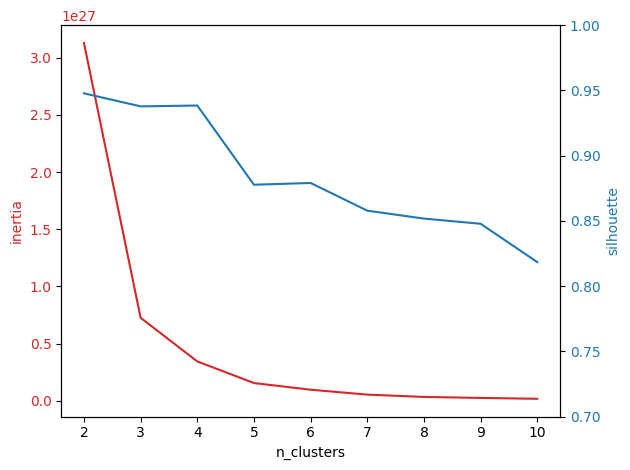

In [10]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('n_clusters')
ax1.set_ylabel('inertia', color='tab:red')
ax1.plot(range(2, max_clusters + 1), inertias, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('silhouette', color='tab:blue')
ax2.plot(range(2, max_clusters + 1), silhouettes, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0.7, 1)

fig.tight_layout()
plt.show();

We can choose K=4 because we have an high silhouette score and the inertia is decreasing

# 7

In [11]:
chosen_k = 4
model = KMeans(n_clusters = chosen_k, random_state = random_state)
y_km = model.fit_predict(X)

In [12]:
from matplotlib import cm
def plot_silhouette(silhouette_vals, y, colors = cm.tab10, plot_noise = False):
    """
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.
    
    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples
    plot_noise:      boolean, assumes the noise to be labeled with a negative integer
    
    """
    cluster_labels = np.unique(y)
    n_clusters = len(cluster_labels)
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels): # generate pairs index, cluster_label
        if (c < 0 and plot_noise == False):
            continue
        c_silhouette_vals = silhouette_vals[y==c] # extracts records with the current cluster label
        c_silhouette_vals.sort() # sort the silhouette vals for the current class
        y_ax_upper += len(c_silhouette_vals)
        color = colors(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
        c_silhouette_avg = np.mean(c_silhouette_vals)
        plt.axvline(c_silhouette_avg, #ymin = y_ax_lower, ymax = y_ax_upper,
                    color=color, linestyle="-.")

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="black", linestyle=":") 
    plt.yticks(yticks, cluster_labels)# + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    # plt.savefig('./figures/silhouette.png', dpi=300)
    plt.show()

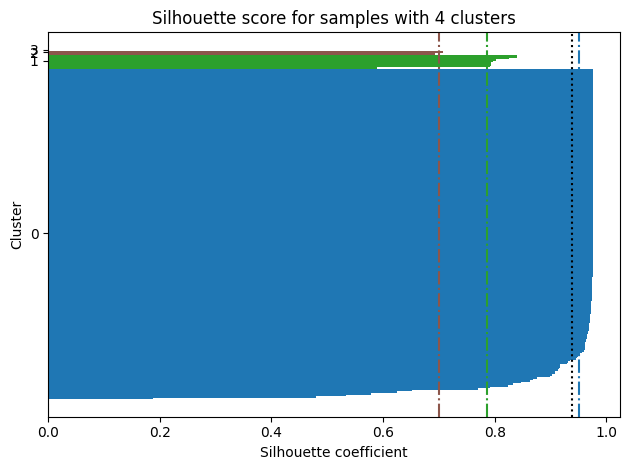

In [13]:
silhouette_score_samples = silhouette_samples(X, y_km, metric = 'euclidean')
plt.title(f'Silhouette score for samples with {chosen_k} clusters')
plot_silhouette(silhouette_score_samples, y_km)


# 8

In [14]:
for col in X.columns:
    if len(X) != sum(np.greater(X[col], 0)):
        continue
    X[col] = np.log(X[col])

In [15]:
X.head()

,GDP at market prices (constant 2005 US$),GDP per capita (constant 2005 US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,23.491897,6.315901,1.386294,2.812617,17.175996
1,23.202067,8.317365,3.806662,-0.496462,14.884701
2,25.805957,8.403665,2.525729,1.821358,17.402292
4,21.933925,10.590022,4.394449,-0.015393,11.343903
5,25.135711,8.168785,1.029619,3.570099,16.966927


# 9

In [22]:
max_clusters_log = 10
params_log = {'n_clusters': range(2, max_clusters_log+1)}
grid_log = ParameterGrid(params_log)
silhouettes_log = []
inertias_log = []
pg_log = list(grid_log)
for p in pg_log:
    model_log = KMeans(**p, random_state = random_state)
    pred_log = model_log.fit_predict(X)
    silhouettes_log.append(silhouette_score(X, pred_log))
    inertias_log.append(model_log.inertia_)


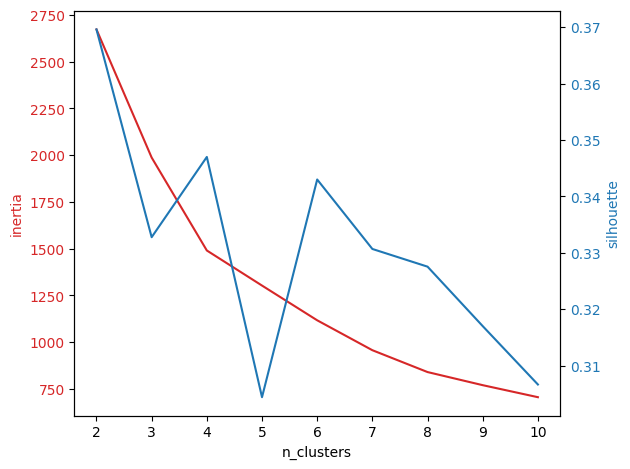

In [25]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('n_clusters')
ax1.set_ylabel('inertia', color='tab:red')
ax1.plot(range(2, max_clusters_log + 1), inertias_log, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('silhouette', color='tab:blue')
ax2.plot(range(2, max_clusters_log + 1), silhouettes_log, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.show();